1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Prediksi: happy (86.52%)


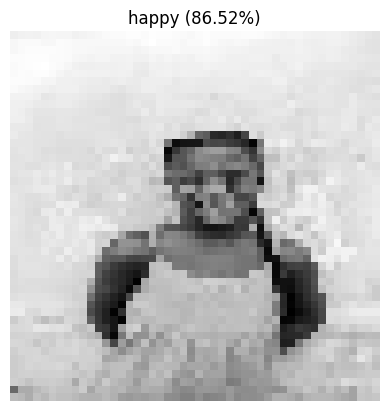

In [5]:
import os
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Konstanta
IMG_SIZE = 48
MODEL_PATH = 'models/emotion_model.h5'
emotion_labels = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']  # urutkan sesuai folder training

# Load model
if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model tidak ditemukan di path: {MODEL_PATH}")
model = load_model(MODEL_PATH)

# Fungsi prediksi gambar
def predict_emotion(img_path):
    if not os.path.exists(img_path):
        print(f"Gambar tidak ditemukan: {img_path}")
        return

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print("Gagal membaca gambar. Format mungkin tidak didukung.")
        return

    img_resized = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    img_norm = img_resized / 255.0
    img_input = img_norm.reshape(1, IMG_SIZE, IMG_SIZE, 1)
    
    prediction = model.predict(img_input)
    label = emotion_labels[np.argmax(prediction)]
    confidence = np.max(prediction)
    
    print(f"Prediksi: {label} ({confidence*100:.2f}%)")

    # Tampilkan gambar
    plt.imshow(img_resized, cmap='gray')
    plt.title(f"{label} ({confidence*100:.2f}%)")
    plt.axis('off')
    plt.show()

# Contoh penggunaan (PASTIKAN FILE INI ADA)
predict_emotion("images/happy_face.jpg")
